## Назначение

Демонстрационный прототип модели-проверяльщика решений ЕГЭ по математике: по эталону и решению ученика выдаёт вердикт и краткое объяснение.

## Входные данные

На каждый пример подаются:

* **Условие задачи** (`condition_for_train`)
* **Эталонное решение** (`solution_ref`)
* **Решение ученика** (`student_solution`)
* (Опционально) **извлечённый ответ** (`answer_norm`) — как справочная информация

## Что делает модель

1. **Сравнивает** решение ученика с эталонным (в рамках текста, без внешней проверки).
2. **Определяет корректность** решения ученика:

   * корректна ли логика/преобразования,
   * соответствует ли вывод эталону.
3. **Формирует вывод** в фиксированном формате.

## Выход модели

Строго два поля:

* `Вердикт: верно | неверно`
* `Пояснение: 2–6 предложений`

  * если **неверно** — кратко указывает, в чём ошибка (тип/место/почему),
  * если **верно** — подтверждает корректность решения.

## Как устроено обучение (демо-версия)

* Базовая модель: **Qwen2.5-0.5B-Instruct**.
* Обучение: **SFT (supervised fine-tuning)** с **LoRA** (обновляется ~1.75% параметров).
* Целевая разметка:

  * `label=1` (gold) — ученик = эталон → вердикт **верно**
  * `label=0` (wrong) — синтетически искажённое решение ученика → вердикт **неверно**
* Ошибки синтетики покрывают типовые классы: неверный финальный ответ, арифметическая ошибка в середине, перепутанные знаки/неравенства/тригонометрия, пропуск ОДЗ и т.д.

## Почему модель “понимает”, что считать ошибкой

В демо-обучении модель видит одновременно:

* корректный эталонный ход решения,
* текст решения ученика (с внесённой ошибкой),
  и учится воспроизводить вердикт и объяснение по примерам.

## Как оценивается качество

Основная метрика: **verdict accuracy** на валидации (320 примеров), извлекается по строке `Вердикт: ...`.
Дополнительно:

* **coverage** — доля ответов, где вердикт удалось извлечь,
* **confusion matrix** (FP/FN),
* точность по типам ошибок (`error_tag`).

## Текущее состояние демо-результатов

* `val verdict-acc ≈ 0.9875`, `coverage=1.0`
* Ошибки в основном: ложные “верно” на части неверных примеров (FP).

## Ограничения демо-версии

* Ошибочные решения синтетические, пояснения частично шаблонные.
* Проверка основана на текстовом сравнении с эталоном; это не строгий математический доказатель.
* В прод-версии предполагается дообучение на **реальных** ошибочных решениях и более “локальных” пояснениях (с привязкой к шагам).


Python: 3.12.7
Torch: 2.4.1+cu121
CUDA available: True
GPU: NVIDIA GeForce RTX 4070 SUPER
BF16 supported: True
Loaded: (20356, 10)
Columns: ['row_uid', 'split', 'label', 'error_tag', 'condition_for_train', 'student_solution', 'solution_ref', 'answer_norm', 'diff_correct', 'diff_student']

split:
 split
train    20036
val        320
Name: count, dtype: int64

label:
 label
1    10178
0    10178
Name: count, dtype: int64
Using schema: {'uid': 'row_uid', 'split': 'split', 'label': 'label', 'tag': 'error_tag', 'cond': 'condition_for_train', 'sol_ref': 'solution_ref', 'sol_student': 'student_solution', 'sol_wrong': None, 'ans': 'answer_norm'}
Prepared rows: (20356, 6)
split
train    20036
val        320
Name: count, dtype: int64
label
1    10178
0    10178
Name: count, dtype: int64
                uid  split  label error_tag
0  b48a483a72d1df9a  train      1      gold
1  1e7589cf50995e39  train      1      gold
trainable params: 8,798,208 || all params: 502,830,976 || trainable%: 1.7497


Map:   0%|          | 0/20036 [00:00<?, ? examples/s]

Map:   0%|          | 0/320 [00:00<?, ? examples/s]

Filter:   0%|          | 0/20036 [00:00<?, ? examples/s]

Filter:   0%|          | 0/320 [00:00<?, ? examples/s]

The model is already on multiple devices. Skipping the move to device specified in `args`.
The tokenizer has new PAD/BOS/EOS tokens that differ from the model config and generation config. The model config and generation config were aligned accordingly, being updated with the tokenizer's values. Updated tokens: {'bos_token_id': None, 'pad_token_id': 151643}.


tokenized train: 15145 tokenized val: 250


You're using a Qwen2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
C:\Users\narumaru\anaconda3\Lib\site-packages\transformers\integrations\sdpa_attention.py:96: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(
C:\Users\narumaru\anaconda3\Lib\site-packages\torch\utils\checkpoint.py:295: FutureWarning: `torch.cpu.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cpu', args...)` instead.
  with torch.enable_grad(), device_autocast_ctx, torch.cpu.amp.autocast(**ctx.cpu_autocast_kwargs):  # type: ignore[attr-defined]


Step,Training Loss,Validation Loss
200,0.003200,0.000618
400,0.003100,0.000394
600,0.001600,0.000739
800,0.001800,0.000492
1000,0.000500,0.000035
1200,0.000100,0.000021
1400,0.000100,0.000063
1600,0.000100,0.000040
1800,0.000400,0.000029


C:\Users\narumaru\anaconda3\Lib\site-packages\torch\utils\checkpoint.py:295: FutureWarning: `torch.cpu.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cpu', args...)` instead.
  with torch.enable_grad(), device_autocast_ctx, torch.cpu.amp.autocast(**ctx.cpu_autocast_kwargs):  # type: ignore[attr-defined]
C:\Users\narumaru\anaconda3\Lib\site-packages\torch\utils\checkpoint.py:295: FutureWarning: `torch.cpu.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cpu', args...)` instead.
  with torch.enable_grad(), device_autocast_ctx, torch.cpu.amp.autocast(**ctx.cpu_autocast_kwargs):  # type: ignore[attr-defined]
C:\Users\narumaru\anaconda3\Lib\site-packages\torch\utils\checkpoint.py:295: FutureWarning: `torch.cpu.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cpu', args...)` instead.
  with torch.enable_grad(), device_autocast_ctx, torch.cpu.amp.autocast(**ctx.cpu_autocast_kwargs):  # type: ignore[attr-defined]
C:\Users\narumar

TrainOutput(global_step=1894, training_loss=0.017404934551988247, metrics={'train_runtime': 9388.5495, 'train_samples_per_second': 3.226, 'train_steps_per_second': 0.202, 'total_flos': 8.727748279728e+16, 'train_loss': 0.017404934551988247, 'epoch': 2.0})
Saved LoRA adapter: outputs2\ege_checker_qwen2p5_0p5b_lora_synth_v21\lora_adapter
Saved tokenizer: outputs2\ege_checker_qwen2p5_0p5b_lora_synth_v21\tokenizer
Saved merged model: outputs2\ege_checker_qwen2p5_0p5b_lora_synth_v21\merged_model


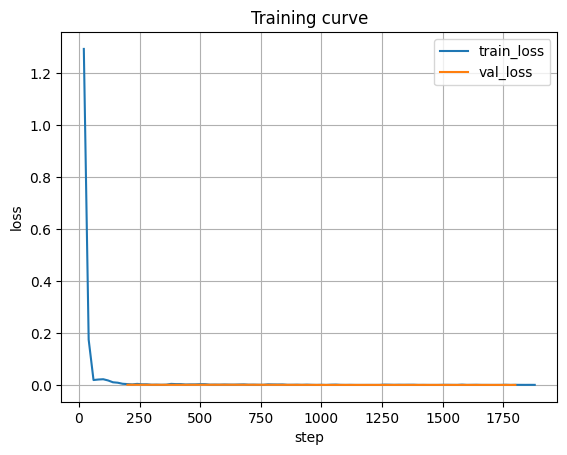

The following generation flags are not valid and may be ignored: ['temperature', 'top_p', 'top_k']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Saved: outputs2\ege_checker_qwen2p5_0p5b_lora_synth_v21\loss_curve.png
val verdict-acc: 0.9875 coverage: 1.0
unknown verdict count: 0 of 320


,error_tag,n,acc
0,gold,160,1.000000
1,wrong_final_answer_replace,55,1.000000
2,intermediate_arithmetic_slip_local,53,0.943396
3,intermediate_arithmetic_slip_propagated,47,1.000000
4,swap_trig,3,1.000000
5,swap_inequality,2,0.500000


Confusion matrix (rows=true, cols=pred):
 [[156   4]
 [  0 160]]
TN, FP, FN, TP: 156 4 0 160


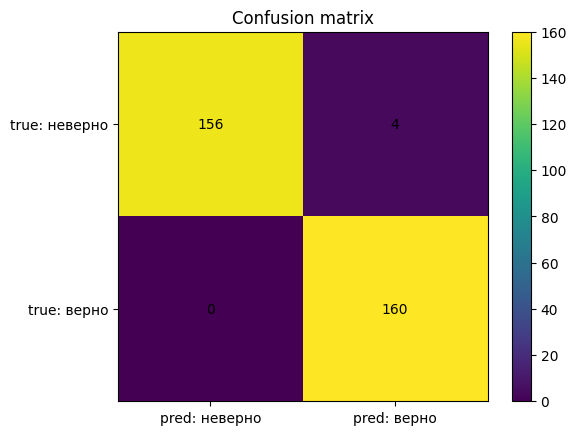

[val #1] label=1 tag=gold uid=77af66ef484b71b6

[MODEL OUTPUT]
 Вердикт: верно
Пояснение: Решение ученика соответствует эталону: ключевые преобразования выполнены корректно, противоречий нет, вывод и ответ согласуются.
[val #2] label=1 tag=gold uid=476dae18b7e2437b

[MODEL OUTPUT]
 Вердикт: верно
Пояснение: Решение ученика соответствует эталону: ключевые преобразования выполнены корректно, противоречий нет, вывод и ответ согласуются.
[val #3] label=1 tag=gold uid=24593fadedaffaef

[MODEL OUTPUT]
 Вердикт: верно
Пояснение: Решение ученика соответствует эталону: ключевые преобразования выполнены корректно, противоречий нет, вывод и ответ согласуются.


In [28]:
# ============================================================
# EGE Solution Checker — LoRA SFT fine-tuning (synth_v21)
# Base: Qwen/Qwen2.5-0.5B-Instruct
# Dataset: all_problems_balanced_synth_v21.parquet
# Goal: verdict (верно/неверно) + explanation, comparing student vs reference solution
# ============================================================

# ---------------------------
# 0 — Env safety (run first!)
# ---------------------------
import os
os.environ.setdefault("TOKENIZERS_PARALLELISM", "false")

# Avoid TF/Keras import path issues (we don't need TF for this notebook)
os.environ.setdefault("TRANSFORMERS_NO_TF", "1")
os.environ.setdefault("TRANSFORMERS_NO_FLAX", "1")

# If you ever hit hf_xet/Xet download issues, disable it (safe default)
os.environ.setdefault("HF_HUB_DISABLE_XET", "1")


# ---------------------------
# 1 — Imports + versions
# ---------------------------
import re
import math
import json
import random
from dataclasses import dataclass
from pathlib import Path
from typing import Dict, Any, List, Optional, Tuple

import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt

from datasets import Dataset
from transformers import (
    AutoTokenizer,
    AutoModelForCausalLM,
    TrainingArguments,
    Trainer,
    set_seed,
)
from peft import LoraConfig, get_peft_model

print("Python:", f"{os.sys.version_info.major}.{os.sys.version_info.minor}.{os.sys.version_info.micro}")
print("Torch:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("GPU:", torch.cuda.get_device_name(0))
    print("BF16 supported:", torch.cuda.is_bf16_supported())


# ---------------------------
# 2 — Config
# ---------------------------
SEED = 42
set_seed(SEED)
random.seed(SEED)
np.random.seed(SEED)

DATA_PATH = Path("./synth_v21/all_problems_balanced_synth_v21.parquet")
OUT_DIR = Path("./outputs2/ege_checker_qwen2p5_0p5b_lora_synth_v21")

MODEL_NAME = "Qwen/Qwen2.5-0.5B-Instruct"

MAX_SEQ_LEN = 2048
MAX_NEW_TOKENS_EVAL = 160

PER_DEVICE_TRAIN_BS = 2
PER_DEVICE_EVAL_BS = 2
GRAD_ACCUM_STEPS = 8 
LR = 2e-4
EPOCHS = 2
WARMUP_RATIO = 0.03
EVAL_STEPS = 200
SAVE_STEPS = 200
LOG_STEPS = 20

OUT_DIR.mkdir(parents=True, exist_ok=True)


# ---------------------------
# Cell 3 — Load dataset
# ---------------------------
df = pd.read_parquet(DATA_PATH)
print("Loaded:", df.shape)
print("Columns:", list(df.columns))
print("\nsplit:\n", df["split"].value_counts(dropna=False))
print("\nlabel:\n", df["label"].value_counts(dropna=False))


# ---------------------------
# 4 — Column detection (robust to minor schema changes)
# ---------------------------
def pick_first_existing(cols: List[str], candidates: List[str]) -> Optional[str]:
    s = set(cols)
    for c in candidates:
        if c in s:
            return c
    return None

def detect_schema(df: pd.DataFrame) -> Dict[str, str]:
    cols = list(df.columns)

    uid_col = pick_first_existing(cols, ["row_uid", "uid", "example_id", "id"])
    split_col = pick_first_existing(cols, ["split"])
    label_col = pick_first_existing(cols, ["label"])
    tag_col = pick_first_existing(cols, ["error_tag", "synthetic_error_tag", "tag"])

    # Condition
    cond_col = pick_first_existing(cols, ["condition_for_train", "condition_final", "condition_rus_clean", "condition_clean", "condition_rus", "condition"])

    # Reference (correct) solution
    sol_ref_col = pick_first_existing(cols, ["solution_rus_clean", "solution_ref", "solution_ref_final", "solution_for_train", "solution_rus", "solution"])

    # Student solution (variant: correct or wrong)
    sol_student_col = pick_first_existing(
        cols,
        ["student_solution", "solution_student", "solution_synth", "solution_variant", "solution_pred", "solution_wrong", "solution_mutated"]
    )

    # Sometimes people store both correct+wrong separately; then student is built by label.
    sol_wrong_col = pick_first_existing(cols, ["solution_wrong", "wrong_solution"])

    # Answer (optional, used only to provide context in prompt)
    ans_col = pick_first_existing(cols, ["answer_norm", "answer_ref", "answer_rus", "answer_tex"])

    schema = {
        "uid": uid_col,
        "split": split_col,
        "label": label_col,
        "tag": tag_col,
        "cond": cond_col,
        "sol_ref": sol_ref_col,
        "sol_student": sol_student_col,
        "sol_wrong": sol_wrong_col,
        "ans": ans_col,
    }

    missing = [k for k, v in schema.items() if k in ["split", "label", "cond", "sol_ref"] and v is None]
    if missing:
        raise ValueError(
            "Не удалось определить обязательные колонки: "
            f"{missing}\nДоступные колонки: {cols}"
        )

    if schema["sol_student"] is None and schema["sol_wrong"] is None:
        raise ValueError(
            "Не найдена колонка с решением ученика (student_solution/solution_student/...) "
            "и не найдена колонка wrong_solution/solution_wrong.\n"
            f"Доступные колонки: {cols}"
        )

    return schema

SCHEMA = detect_schema(df)
print("Using schema:", SCHEMA)


# ---------------------------
# 5 — Build training rows (messages + assistant target)
# ---------------------------
SYSTEM_PROMPT = (
    "Ты — эксперт ЕГЭ по математике и проверяешь решения.\n"
    "Тебе дано условие задачи, эталонное решение и решение ученика.\n"
    "Нужно сравнить решение ученика с эталоном и оценить корректность логики.\n\n"
    "Формат ответа строго:\n"
    "Вердикт: верно|неверно\n"
    "Пояснение: 2–6 предложений. Если неверно — укажи конкретный шаг/место, где ошибка, и почему."
)

# Lightweight, tag-based explanation templates (only for training targets).
# Tag is NOT shown to model as metadata; only used to generate a natural explanation string.
TAG2EXPL = {
    # common
    "wrong_final_answer_replace": "В вычислениях получается один результат, но в конце указан другой ответ. Итоговый ответ не следует из приведённых преобразований.",
    "wrong_final_answer_replace_fallback": "В конце указан ответ, который не соответствует выполненным вычислениям. Нужна проверка последнего шага и пересчёт ответа.",
    "wrong_final_answer_append": "В конце добавлен неверный знак/лишний фрагмент, из-за чего финальный ответ становится неправильным.",
    "intermediate_arithmetic_slip_local": "В одном из промежуточных шагов допущена арифметическая ошибка (неверно посчитали/подставили), поэтому дальнейшие выводы некорректны.",
    "intermediate_arithmetic_slip_propagated": "В середине решения допущена арифметическая ошибка, из-за чего итоговый ответ получается неверным.",
    "intermediate_arithmetic_slip": "В решении есть арифметическая ошибка в вычислениях, из-за чего дальнейшие шаги невалидны.",
    # logic-ish
    "flip_sign": "В одном из шагов перепутан знак (плюс/минус), поэтому выражение преобразовано неверно и результат искажается.",
    "swap_trig": "Неверно использована тригонометрическая функция (например, перепутаны sin и cos или их связь), из-за чего дальнейшие вычисления некорректны.",
    "swap_inequality": "Неверно использован знак неравенства (перепутано < и > или нарушено условие), поэтому вывод о свойствах/типе объекта неверен.",
    "drop_odz": "Не учтена область допустимых значений (ОДЗ) или ограничения, поэтому часть рассуждений/ответ может быть неверной.",
}

def normalize_ws(text: str) -> str:
    text = "" if text is None else str(text)
    text = text.replace("\r\n", "\n").replace("\r", "\n")
    text = re.sub(r"[ \t]+", " ", text)
    text = re.sub(r"\n{3,}", "\n\n", text)
    return text.strip()

def smart_clip(text: str, max_chars: int = 2400) -> str:
    """
    Keep text within max_chars.
    Strategy: keep head + tail; try to preserve 'Ответ' block if present.
    """
    text = normalize_ws(text)
    if len(text) <= max_chars:
        return text

    m = re.search(r"(Ответ\s*[:：].{0,200})", text, flags=re.IGNORECASE | re.DOTALL)
    answer_snip = m.group(1).strip() if m else ""

    head = text[: max_chars // 2].rstrip()
    tail = text[-(max_chars // 2):].lstrip()

    pieces = [head, "...\n", tail]
    if answer_snip and answer_snip not in head and answer_snip not in tail:
        pieces = [head, "\n...\n", answer_snip, "\n...\n", tail]

    clipped = "".join(pieces)
    return clipped[: max_chars + 200].strip()

def make_user_prompt(condition: str, sol_ref: str, sol_student: str, answer: Optional[str]) -> str:
    condition = smart_clip(condition, max_chars=1200)
    sol_ref = smart_clip(sol_ref, max_chars=2600)
    sol_student = smart_clip(sol_student, max_chars=2600)

    parts = [
        "Условие задачи:\n" + condition,
    ]
    if answer:
        parts.append("Ожидаемый ответ (если выделен из источника): " + normalize_ws(answer))
    parts += [
        "\nЭталонное решение:\n" + sol_ref,
        "\nРешение ученика:\n" + sol_student,
        "\nПроверь решение ученика по логике и соответствию эталону. Вердикт и пояснение — в указанном формате.",
    ]
    return "\n\n".join(parts).strip()

def make_assistant_target(label: int, tag: Optional[str]) -> str:
    if int(label) == 1:
        return (
            "Вердикт: верно\n"
            "Пояснение: Решение ученика соответствует эталону: ключевые преобразования выполнены корректно, противоречий нет, вывод и ответ согласуются."
        )
    base = TAG2EXPL.get(str(tag), "В решении есть логическая/вычислительная ошибка, из-за чего вывод не следует из предыдущих шагов.")
    return f"Вердикт: неверно\nПояснение: {base}"

def build_rows(df: pd.DataFrame, schema: Dict[str, str]) -> pd.DataFrame:
    uid = schema["uid"]
    cond = schema["cond"]
    sol_ref = schema["sol_ref"]
    sol_student = schema["sol_student"]
    sol_wrong = schema["sol_wrong"]
    split = schema["split"]
    label = schema["label"]
    tag = schema["tag"]
    ans = schema["ans"]

    # Construct student solution if needed (from label + correct/wrong)
    if sol_student is None:
        if sol_wrong is None:
            raise ValueError("Нет sol_student и нет sol_wrong — нечего подставлять как решение ученика.")
        student_series = np.where(df[label].astype(int).values == 1, df[sol_ref].astype(str).values, df[sol_wrong].astype(str).values)
        df = df.copy()
        df["__student_solution__"] = student_series
        sol_student = "__student_solution__"

    # Build messages + target
    rows = []
    for i in range(len(df)):
        r = df.iloc[i]
        condition = r[cond]
        sref = r[sol_ref]
        sstu = r[sol_student]
        answer = (r[ans] if ans else None)
        user_prompt = make_user_prompt(condition, sref, sstu, answer)

        messages = [
            {"role": "system", "content": SYSTEM_PROMPT},
            {"role": "user", "content": user_prompt},
        ]
        assistant = make_assistant_target(int(r[label]), (r[tag] if tag else None))

        rows.append({
            "uid": str(r[uid]) if uid else str(i),
            "split": str(r[split]),
            "label": int(r[label]),
            "error_tag": str(r[tag]) if tag else ("gold" if int(r[label]) == 1 else "unknown"),
            "messages": messages,
            "assistant": assistant,
        })

    return pd.DataFrame(rows)

rows_df = build_rows(df, SCHEMA)
print("Prepared rows:", rows_df.shape)
print(rows_df["split"].value_counts())
print(rows_df["label"].value_counts())
print(rows_df.head(2)[["uid","split","label","error_tag"]])


# ---------------------------
# 6 — HF Datasets + tokenizer/model
# ---------------------------
train_rows = rows_df[rows_df["split"] == "train"].reset_index(drop=True)
val_rows = rows_df[rows_df["split"] == "val"].reset_index(drop=True)

train_ds_raw = Dataset.from_pandas(train_rows, preserve_index=False)
val_ds_raw = Dataset.from_pandas(val_rows, preserve_index=False)

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME, use_fast=True)
if tokenizer.pad_token_id is None:
    tokenizer.pad_token = tokenizer.eos_token

dtype = torch.bfloat16 if (torch.cuda.is_available() and torch.cuda.is_bf16_supported()) else torch.float16
model = AutoModelForCausalLM.from_pretrained(
    MODEL_NAME,
    torch_dtype=dtype,
    device_map="auto",
)
model.config.use_cache = False
model.gradient_checkpointing_enable()


# ---------------------------
# 7 — LoRA attach
# ---------------------------
lora_config = LoraConfig(
    r=16,
    lora_alpha=32,
    lora_dropout=0.05,
    bias="none",
    task_type="CAUSAL_LM",
    target_modules=["q_proj", "k_proj", "v_proj", "o_proj", "gate_proj", "up_proj", "down_proj"],
)

model = get_peft_model(model, lora_config)
model.print_trainable_parameters()


# ---------------------------
# 8 — Tokenization: делаем datasets ТОЛЬКО для Trainer (без строковых полей)
# ---------------------------
def tokenize_for_trainer(example: Dict[str, Any]) -> Dict[str, Any]:
    messages = example["messages"]
    assistant_text = example["assistant"]

    # prompt = system+user (+ generation prompt)
    prompt_str = tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
    # full = system+user+assistant
    full_messages = messages + [{"role": "assistant", "content": assistant_text}]
    full_str = tokenizer.apply_chat_template(full_messages, tokenize=False, add_generation_prompt=False)

    prompt_ids = tokenizer(
        prompt_str, add_special_tokens=False, truncation=True, max_length=MAX_SEQ_LEN
    )["input_ids"]

    full = tokenizer(
        full_str, add_special_tokens=False, truncation=True, max_length=MAX_SEQ_LEN
    )

    input_ids = full["input_ids"]
    attention_mask = full["attention_mask"]

    prompt_len = min(len(prompt_ids), len(input_ids))
    labels = input_ids.copy()
    labels[:prompt_len] = [-100] * prompt_len

    return {
        "input_ids": input_ids,
        "attention_mask": attention_mask,
        "labels": labels,
    }

train_sup = train_ds_raw.map(tokenize_for_trainer, remove_columns=train_ds_raw.column_names)
val_sup   = val_ds_raw.map(tokenize_for_trainer, remove_columns=val_ds_raw.column_names)

def has_any_supervised_tokens(ex: Dict[str, Any]) -> bool:
    return any(x != -100 for x in ex["labels"])

train_sup = train_sup.filter(has_any_supervised_tokens)
val_sup   = val_sup.filter(has_any_supervised_tokens)

print("tokenized train:", len(train_sup), "tokenized val:", len(val_sup))


# ---------------------------
# 9 — Data collator (паддим только числовые поля)
# ---------------------------
@dataclass
class DataCollatorForCausalLM:
    tokenizer: Any

    def __call__(self, features: List[Dict[str, Any]]) -> Dict[str, torch.Tensor]:
        # labels отдельно
        labels = [f["labels"] for f in features]

        pad_features = [{"input_ids": f["input_ids"], "attention_mask": f["attention_mask"]} for f in features]

        batch = self.tokenizer.pad(
            pad_features,
            padding=True,
            return_tensors="pt",
        )

        max_len = batch["input_ids"].shape[1]
        padded_labels = []
        for lab in labels:
            if len(lab) < max_len:
                lab = lab + [-100] * (max_len - len(lab))
            else:
                lab = lab[:max_len]
            padded_labels.append(lab)

        batch["labels"] = torch.tensor(padded_labels, dtype=torch.long)
        return batch

collator = DataCollatorForCausalLM(tokenizer)


# ---------------------------
# 10 — TrainingArguments + Trainer (без TRL)
# ---------------------------
def build_training_args(**kwargs) -> TrainingArguments:
    # transformers 4.57
    try:
        return TrainingArguments(**kwargs, eval_strategy="steps")
    except TypeError:
        return TrainingArguments(**kwargs, evaluation_strategy="steps")

args = build_training_args(
    output_dir=str(OUT_DIR),
    per_device_train_batch_size=PER_DEVICE_TRAIN_BS,
    per_device_eval_batch_size=PER_DEVICE_EVAL_BS,
    gradient_accumulation_steps=GRAD_ACCUM_STEPS,
    learning_rate=LR,
    num_train_epochs=EPOCHS,
    warmup_ratio=WARMUP_RATIO,
    lr_scheduler_type="cosine",
    logging_steps=LOG_STEPS,
    save_strategy="steps",
    save_steps=SAVE_STEPS,
    save_total_limit=2,
    eval_steps=EVAL_STEPS,
    bf16=torch.cuda.is_available() and torch.cuda.is_bf16_supported(),
    fp16=torch.cuda.is_available() and not torch.cuda.is_bf16_supported(),
    optim="adamw_torch",
    report_to="none",
    dataloader_num_workers=0,
    remove_unused_columns=True,
    seed=SEED,
)

try:
    trainer = Trainer(
        model=model,
        args=args,
        train_dataset=train_sup,
        eval_dataset=val_sup,
        data_collator=collator,
        processing_class=tokenizer,
    )
except TypeError:
    trainer = Trainer(
        model=model,
        args=args,
        train_dataset=train_sup,
        eval_dataset=val_sup,
        data_collator=collator,
        tokenizer=tokenizer,
    )

train_result = trainer.train()
print(train_result)


# ---------------------------
# 11 — Save LoRA adapter + tokenizer (+ optional merged)
# ---------------------------
ADAPTER_DIR = OUT_DIR / "lora_adapter"
ADAPTER_DIR.mkdir(parents=True, exist_ok=True)

trainer.model.save_pretrained(str(ADAPTER_DIR))
tokenizer.save_pretrained(str(OUT_DIR / "tokenizer"))

print("Saved LoRA adapter:", ADAPTER_DIR)
print("Saved tokenizer:", OUT_DIR / "tokenizer")

MERGED_DIR = OUT_DIR / "merged_model"
MERGE_AND_SAVE = True
if MERGE_AND_SAVE:
    merged = trainer.model.merge_and_unload()
    merged.save_pretrained(str(MERGED_DIR), safe_serialization=True)
    tokenizer.save_pretrained(str(MERGED_DIR))
    print("Saved merged model:", MERGED_DIR)


# ---------------------------
# 12 — Plot train/eval loss
# ---------------------------
log_df = pd.DataFrame(trainer.state.log_history)

train_curve = log_df[log_df.get("loss").notna()][["step", "loss"]].copy() if "loss" in log_df else pd.DataFrame()
eval_curve  = log_df[log_df.get("eval_loss").notna()][["step", "eval_loss"]].copy() if "eval_loss" in log_df else pd.DataFrame()

plt.figure()
if len(train_curve):
    plt.plot(train_curve["step"], train_curve["loss"], label="train_loss")
if len(eval_curve):
    plt.plot(eval_curve["step"], eval_curve["eval_loss"], label="val_loss")
plt.xlabel("step")
plt.ylabel("loss")
plt.title("Training curve")
plt.legend()
plt.grid(True)
plt.show()

curve_path = OUT_DIR / "loss_curve.png"
plt.figure()
if len(train_curve):
    plt.plot(train_curve["step"], train_curve["loss"], label="train_loss")
if len(eval_curve):
    plt.plot(eval_curve["step"], eval_curve["eval_loss"], label="val_loss")
plt.xlabel("step")
plt.ylabel("loss")
plt.title("Training curve")
plt.legend()
plt.grid(True)
plt.savefig(curve_path, dpi=150, bbox_inches="tight")
plt.close()
print("Saved:", curve_path)


# ---------------------------
# 13 — Generation verdict accuracy на val (используем val_ds_raw, НЕ val_sup)
# ---------------------------
VERDICT_RE = re.compile(r"^вердикт\s*:\s*(верно|неверно)\b", re.IGNORECASE | re.MULTILINE)

def extract_verdict(text: str) -> Optional[int]:
    m = VERDICT_RE.search(text or "")
    if not m:
        return None
    return 1 if m.group(1).lower() == "верно" else 0

@torch.no_grad()
def generate_assistant_only(messages: List[Dict[str, str]], max_new_tokens: int = MAX_NEW_TOKENS_EVAL) -> str:
    prompt = tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
    inputs = tokenizer(prompt, return_tensors="pt").to(model.device)

    out = model.generate(
        **inputs,
        max_new_tokens=max_new_tokens,
        do_sample=False,  # greedy
        eos_token_id=tokenizer.eos_token_id,
        pad_token_id=tokenizer.pad_token_id,
    )
    gen_ids = out[0, inputs["input_ids"].shape[1]:]
    return tokenizer.decode(gen_ids, skip_special_tokens=True)

model.eval()

y_true, y_pred, tags = [], [], []
unknown = 0

for ex in val_ds_raw: 
    assistant_text = generate_assistant_only(ex["messages"], max_new_tokens=MAX_NEW_TOKENS_EVAL)
    pred = extract_verdict(assistant_text)
    if pred is None:
        unknown += 1
        y_pred.append(-1)
    else:
        y_pred.append(int(pred))

    y_true.append(int(ex["label"]))
    tags.append(str(ex["error_tag"]))

coverage = float(np.mean([p != -1 for p in y_pred]))
acc = float(np.mean([(p == t) for p, t in zip(y_pred, y_true) if p != -1])) if coverage > 0 else 0.0

print("val verdict-acc:", round(acc, 4), "coverage:", round(coverage, 4))
print("unknown verdict count:", unknown, "of", len(y_true))


# ---------------------------
# 14 — Accuracy by error_tag + confusion matrix
# ---------------------------
from collections import defaultdict

acc_by_tag = defaultdict(lambda: {"ok": 0, "n": 0})
for t, p, tag in zip(y_true, y_pred, tags):
    if p == -1:
        continue
    acc_by_tag[tag]["n"] += 1
    acc_by_tag[tag]["ok"] += int(p == t)

acc_by_tag_df = pd.DataFrame(
    [(tag, v["n"], v["ok"] / max(1, v["n"])) for tag, v in sorted(acc_by_tag.items(), key=lambda x: -x[1]["n"])],
    columns=["error_tag", "n", "acc"]
)
display(acc_by_tag_df.head(30))

covered = [(t, p) for t, p in zip(y_true, y_pred) if p != -1]
if covered:
    yt = np.array([t for t, _ in covered], dtype=int)
    yp = np.array([p for _, p in covered], dtype=int)

    cm = np.zeros((2, 2), dtype=int)
    for t, p in zip(yt, yp):
        cm[t, p] += 1

    print("Confusion matrix (rows=true, cols=pred):\n", cm)
    print("TN, FP, FN, TP:", cm[0,0], cm[0,1], cm[1,0], cm[1,1])

    plt.figure()
    plt.imshow(cm)
    plt.xticks([0, 1], ["pred: неверно", "pred: верно"])
    plt.yticks([0, 1], ["true: неверно", "true: верно"])
    plt.title("Confusion matrix")
    plt.colorbar()
    for i in range(2):
        for j in range(2):
            plt.text(j, i, str(cm[i, j]), ha="center", va="center")
    plt.show()


# ---------------------------
# 15 — Quick manual preview
# ---------------------------
def preview_example(split: str = "val", n: int = 3, seed: int = 123):
    rng = random.Random(seed)
    subset = [ex for ex in val_ds_raw] if split == "val" else [ex for ex in train_ds_raw]
    picks = [subset[rng.randrange(len(subset))] for _ in range(n)]
    for k, ex in enumerate(picks, 1):
        out = generate_assistant_only(ex["messages"], max_new_tokens=MAX_NEW_TOKENS_EVAL)
        print("=" * 90)
        print(f"[{split} #{k}] label={ex['label']} tag={ex['error_tag']} uid={ex['uid']}")
        print("\n[MODEL OUTPUT]\n", out[:1200])

preview_example("val", n=3, seed=SEED)
